In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import pandas as pd
import pylhe
from tqdm import tqdm
import itertools

In [3]:
ak.__version__

'1.7.0'

In [4]:
# import the root file
f_Att = uproot.open('/workspace/Att_400s/Events/run_01/tag_1_delphes_events.root')
f_ttW = uproot.open('/workspace/ttW/Events/run_01/tag_1_delphes_events.root')
f_ttZ = uproot.open('/workspace/ttZ/Events/run_01/tag_1_delphes_events.root')
f_tZj = uproot.open('/workspace/tZj/Events/run_01/tag_1_delphes_events.root')

f_Att.keys()

['ProcessID0;1', 'Delphes;1']

In [5]:
f_Att['Delphes;1'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint8_t[]                | AsJagged(AsDtype('uint8'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    

In [6]:
# Define Trees
tree_particle_Att = f_Att['Delphes;1/Particle']
tree_electron_Att = f_Att['Delphes;1/Electron']
tree_muon_Att = f_Att['Delphes;1/Muon']
tree_jet_Att = f_Att['Delphes;1/Jet']
tree_Emiss_Att = f_Att['Delphes;1/MissingET']
tree_HT_Att = f_Att['Delphes;1/ScalarHT']

tree_particle_ttW = f_ttW['Delphes;1/Particle']
tree_electron_ttW = f_ttW['Delphes;1/Electron']
tree_muon_ttW = f_ttW['Delphes;1/Muon']
tree_jet_ttW = f_ttW['Delphes;1/Jet']
tree_Emiss_ttW = f_ttW['Delphes;1/MissingET']
tree_HT_ttW = f_ttW['Delphes;1/ScalarHT']

tree_particle_ttZ = f_ttZ['Delphes;1/Particle']
tree_electron_ttZ = f_ttZ['Delphes;1/Electron']
tree_muon_ttZ = f_ttZ['Delphes;1/Muon']
tree_jet_ttZ = f_ttZ['Delphes;1/Jet']
tree_Emiss_ttZ = f_ttZ['Delphes;1/MissingET']
tree_HT_ttZ = f_ttZ['Delphes;1/ScalarHT']

tree_particle_tZj = f_tZj['Delphes;1/Particle']
tree_electron_tZj = f_tZj['Delphes;1/Electron']
tree_muon_tZj = f_tZj['Delphes;1/Muon']
tree_jet_tZj = f_tZj['Delphes;1/Jet']
tree_Emiss_tZj = f_tZj['Delphes;1/MissingET']
tree_HT_tZj = f_tZj['Delphes;1/ScalarHT']

tree_jet_Att.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Jet                  | int32_t                  | AsDtype('>i4')                
Jet.fUniqueID        | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.fBits            | uint8_t[]                | AsJagged(AsDtype('uint8'))
Jet.PT               | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Eta              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Phi              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.T                | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Mass             | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaEta         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaPhi         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Flavor           | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.F

In [7]:
Att_particle = tree_particle_Att.arrays(['Particle.Mass'], library='ak')
Att_electron = tree_electron_Att.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
Att_muon = tree_muon_Att.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
Att_jet = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
Att_Emiss = tree_Emiss_Att.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
Att_HT = tree_HT_Att.arrays(['ScalarHT.HT'], library='ak')

ttW_particle = tree_particle_ttW.arrays(['Particle.Mass'])
ttW_electron = tree_electron_ttW.arrays(['Electron.PT',
                                         'Electron.T',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
ttW_muon = tree_muon_ttW.arrays(['Muon.PT',
                                 'Muon.T',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttW_jet = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttW_Emiss = tree_Emiss_ttW.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttW_HT = tree_HT_ttW.arrays(['ScalarHT.HT'], library='ak')

ttZ_particle = tree_particle_ttZ.arrays(['Particle.Mass'])
ttZ_electron = tree_electron_ttZ.arrays(['Electron.PT',
                                         'Electron.T',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
ttZ_muon = tree_muon_ttZ.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttZ_jet = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttZ_Emiss = tree_Emiss_ttZ.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttZ_HT = tree_HT_ttZ.arrays(['ScalarHT.HT'], library='ak')

tZj_particle = tree_particle_tZj.arrays(['Particle.Mass'])
tZj_electron = tree_electron_tZj.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
tZj_muon = tree_muon_tZj.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
tZj_jet = tree_jet_tZj.arrays(['Jet.Mass',
                              'Jet.BTag',
                              'Jet.PT',
                              'Jet.Eta', 
                              'Jet.Phi',
                              'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
tZj_Emiss = tree_Emiss_tZj.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
tZj_HT = tree_HT_tZj.arrays(['ScalarHT.HT'], library='ak')

In [8]:
Att_jet_ak = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttW_jet_ak = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttZ_jet_ak = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
tZj_jet_ak = tree_jet_tZj.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.
 13.5 14.  14.5 15.  15.5]


<Figure size 720x504 with 0 Axes>

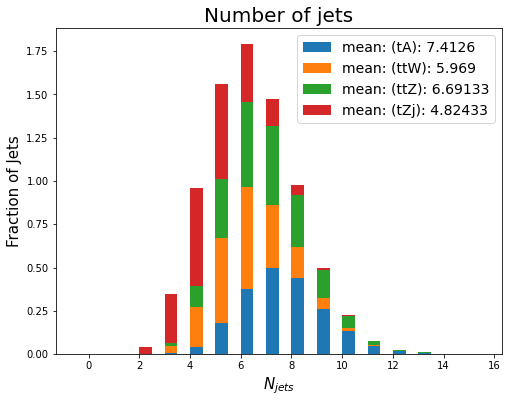

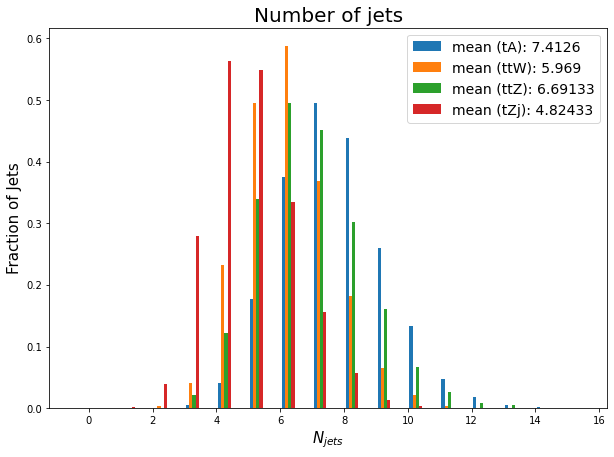

In [12]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 33)
print(bin)
m1, m2, m3, m4 = ak.num(Att_jet_ak['Jet.Mass']), ak.num(ttW_jet_ak['Jet.Mass']), ak.num(ttZ_jet_ak['Jet.Mass']), ak.num(tZj_jet_ak['Jet.Mass']) 
n = ['tA', 'ttW', 'ttZ', 'tZj']
# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'mean: ({n[i-1]}): {round(ak.mean(a), 5)}']) for i, a in enumerate([m1, m2, m3, m4], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=bin, density=True, figsize=(8, 6))

plt.legend(fontsize=14)
plt.xlabel(r'$N_{jets}$' , fontsize=15) 
plt.ylabel("Fraction of Jets", fontsize=15) 
plt.title('Number of jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 33)
m1, m2, m3, m4 = ak.num(Att_jet_ak['Jet.Mass']), ak.num(ttW_jet_ak['Jet.Mass']), ak.num(ttZ_jet_ak['Jet.Mass']), ak.num(tZj_jet_ak['Jet.Mass']) 
n = ['tA', 'ttW', 'ttZ', 'tZj']

plt.hist([m1, m2, m3, m4], bins=bin, density=True, label=[f'mean (tA): {ak.mean(m1)}', f'mean (ttW): {ak.mean(m2)}', f'mean (ttZ): {round(ak.mean(m3), 5)}', f'mean (tZj): {round(ak.mean(m4), 5)}' ])

plt.legend(fontsize=14)
plt.xlabel(r'$N_{jets}$' , fontsize=15) 
plt.ylabel("Fraction of Jets", fontsize=15) 
plt.title('Number of jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

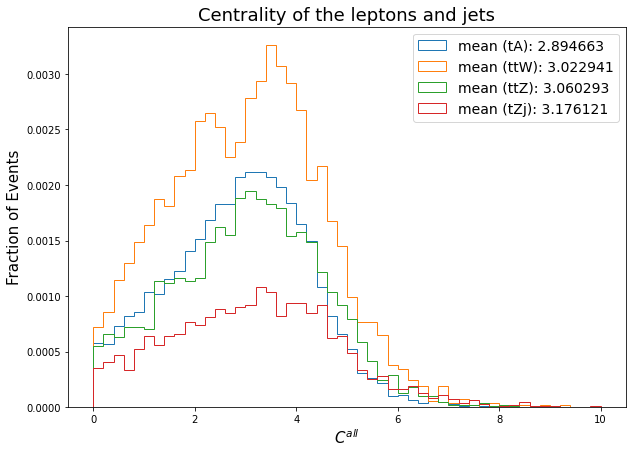

In [30]:
def f(m, pt, phi):
    return np.sqrt(m**2 + (pt/np.sin(phi)**2))

plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 51)
n = np.diff(bin)

m = []
for i in range(len(Att_jet['Jet.Mass'])):
    sumpt = np.sum(Att_jet['Jet.PT'][i])
    if sumpt==0:
        print(i)
    en = 0
    for j in range(len(Att_jet['Jet.Mass'][i])):
        en += f(Att_jet['Jet.Mass'][i][j], Att_jet['Jet.PT'][i][j], Att_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.02802, bins=bin, label='mean (tA): %f' %np.mean(m))

m = []
for i in range(len(ttW_jet['Jet.Mass'])):
    sumpt = np.sum(ttW_jet['Jet.PT'][i])
    en = 0
    for j in range(len(ttW_jet['Jet.Mass'][i])):
        en += f(ttW_jet['Jet.Mass'][i][j], ttW_jet['Jet.PT'][i][j], ttW_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %np.mean(m))


m = []
for i in range(len(ttZ_jet['Jet.Mass'])):
    sumpt = np.sum(ttZ_jet['Jet.PT'][i])
    en = 0
    for j in range(len(ttZ_jet['Jet.Mass'][i])):
        en += f(ttZ_jet['Jet.Mass'][i][j], ttZ_jet['Jet.PT'][i][j], ttZ_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %np.mean(m))

m = []
for i in range(len(tZj_jet['Jet.Mass'])):
    sumpt = np.sum(tZj_jet['Jet.PT'][i])
    en = 0
    for j in range(len(tZj_jet['Jet.Mass'][i])):
        en += f(tZj_jet['Jet.Mass'][i][j], tZj_jet['Jet.PT'][i][j], tZj_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %np.mean(m))

plt.xlabel(r'$C^{all}$', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Centrality of the leptons and jets', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Area below the integral:  0.027963960000000433


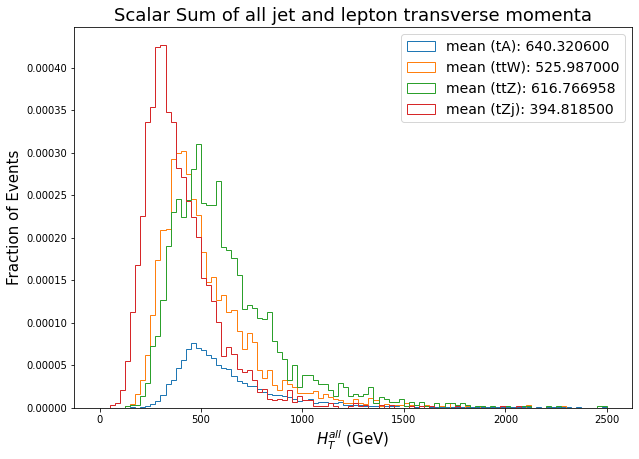

In [28]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 2500, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_HT['ScalarHT.HT']), histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, bins=bin, label='mean (tA): %f' %ak.mean(Att_HT['ScalarHT.HT']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_HT['ScalarHT.HT']))
plt.hist(ak.flatten(ttZ_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_HT['ScalarHT.HT']))
plt.hist(ak.flatten(tZj_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_HT['ScalarHT.HT']))
plt.xlabel(r'$H_{T}^{all}$ (GeV)', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Scalar Sum of all jet and lepton transverse momenta', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Area below the integral:  0.028017198000003834


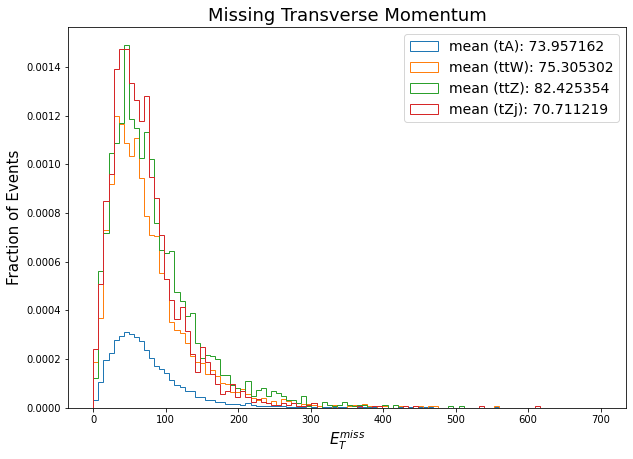

In [33]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 700, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_Emiss['MissingET.MET']), histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, bins=bin, label='mean (tA): %f' %ak.mean(Att_Emiss['MissingET.MET']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_Emiss['MissingET.MET']))
plt.hist(ak.flatten(ttZ_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_Emiss['MissingET.MET']))
plt.hist(ak.flatten(tZj_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_Emiss['MissingET.MET']))
plt.xlabel(r'$E_{T}^{miss}$', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Missing Transverse Momentum', fontsize=18)
plt.legend(fontsize=14)
plt.show()

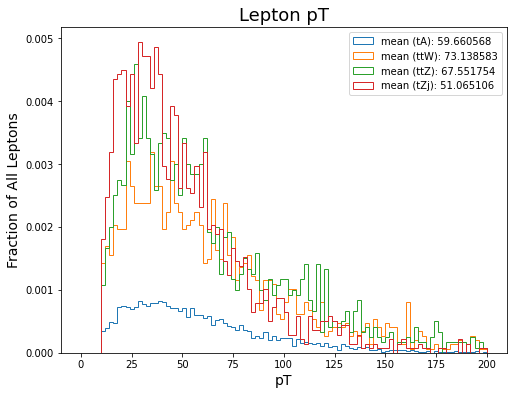

In [40]:
plt.figure(figsize=(8, 6))
m = np.concatenate((ak.to_numpy(ak.flatten(Att_muon['Muon.PT'])), ak.to_numpy(ak.flatten(Att_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.02802, label='mean (tA): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(ttW_muon['Muon.PT'])), ak.to_numpy(ak.flatten(ttW_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1059, label='mean (ttW): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(ttZ_muon['Muon.PT'])), ak.to_numpy(ak.flatten(ttZ_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1298, label='mean (ttZ): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(tZj_muon['Muon.PT'])), ak.to_numpy(ak.flatten(tZj_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1275, label='mean (tZj): %f' %ak.mean(m))
plt.xlabel('pT', fontsize=14)
plt.ylabel('Fraction of All Leptons', fontsize=14)
plt.title('Lepton pT', fontsize=18)
plt.legend()

In [131]:
l1 = list(itertools.combinations([1, 2, 3, 4, 5, 6], 3))
l1
def f(l):
    return np.sqrt(l[0]**2+ l[1]**2+ l[2]**2)
m = []
for i in range(len(l1)):
    m.append(f(l1[i]))
l1, m

([(1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 4),
  (1, 3, 5),
  (1, 3, 6),
  (1, 4, 5),
  (1, 4, 6),
  (1, 5, 6),
  (2, 3, 4),
  (2, 3, 5),
  (2, 3, 6),
  (2, 4, 5),
  (2, 4, 6),
  (2, 5, 6),
  (3, 4, 5),
  (3, 4, 6),
  (3, 5, 6),
  (4, 5, 6)],
 [3.7416573867739413,
  4.58257569495584,
  5.477225575051661,
  6.4031242374328485,
  5.0990195135927845,
  5.916079783099616,
  6.782329983125268,
  6.48074069840786,
  7.280109889280518,
  7.874007874011811,
  5.385164807134504,
  6.164414002968976,
  7.0,
  6.708203932499369,
  7.483314773547883,
  8.06225774829855,
  7.0710678118654755,
  7.810249675906654,
  8.366600265340756,
  8.774964387392123])

In [160]:
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
l1 = f(np.array([1, 2, 3]), np.array([4, 5, 6])).tolist()
print(l1)
[i-j for i in l1[:-1] for j in l1[1:] if i != j]

[4.123105625617661, 5.385164807134504, 6.708203932499369]


[-1.2620591815168432, -2.585098306881709, -1.3230391253648657]

In [171]:
m = [1, 2, 3, 4, 5, 6, 7]
MinIndex = m.index(min(m))
MinIndex

0

100%|██████████| 3000/3000 [00:02<00:00, 1213.29it/s]


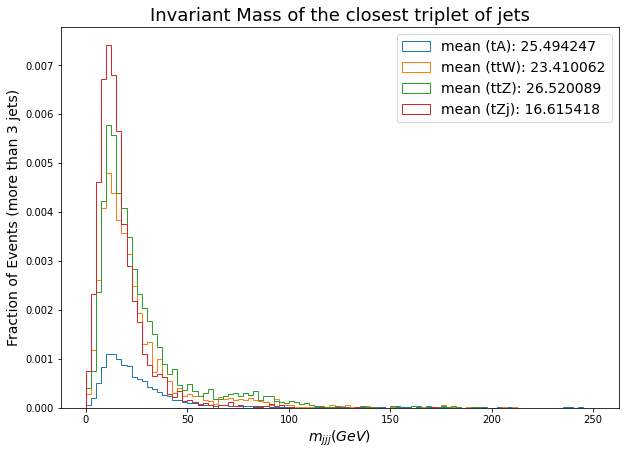

In [194]:
# Invariant Mass of the closest triplet jets
def deltaR_ijk(deltaeta, deltaphi):
    return np.sqrt(np.sum(deltaeta**2)+np.sum(deltaphi**2))

plt.figure(figsize=(10, 7))
bin = np.linspace(0, 250, 101)
n = np.diff(bin)
deltaR = []

def MassTriJet(EventSize, JetMass, JetEta, JetPhi):
    for i in tqdm(range(EventSize)):
        jet_mass, jet_eta, jet_phi = JetMass[i], JetEta[i], JetPhi[i]
        
        if len(jet_phi) >= 3:
            m = []
            jet = zip(jet_mass, jet_eta, jet_phi)
            AllCombination = list(itertools.combinations(jet, 3))
            for j in range(len(AllCombination)):
                eta, phi = AllCombination[j][1], AllCombination[j][2]
                deltaeta = np.array([i-j for i in eta[:-1] for j in eta[1:] if i != j])
                deltaphi = np.array([i-j for i in phi[:-1] for j in phi[1:] if i != j])
                m.append(deltaR_ijk(deltaeta, deltaphi))
            MinIndex = m.index(min(m))
            deltaR.append(sum(AllCombination[MinIndex][0]))
        else: 
            continue
    return deltaR

deltaR = MassTriJet(10000, Att_jet_ak['Jet.Mass'], Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.02802, label='mean (tA): %f' %np.mean(deltaR))

deltaR = []
deltaR = MassTriJet(3000, ttW_jet_ak['Jet.Mass'], ttW_jet_ak['Jet.Eta'], ttW_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1059, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = []
deltaR = MassTriJet(3000, ttZ_jet_ak['Jet.Mass'], ttZ_jet_ak['Jet.Eta'], ttZ_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1298, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = []
deltaR = MassTriJet(3000, tZj_jet_ak['Jet.Mass'], tZj_jet_ak['Jet.Eta'], tZj_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1275, label='mean (tZj): %f' %np.mean(deltaR))
plt.xlabel(r'$m_{jjj}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 3 jets)', fontsize=15)
plt.title('Invariant Mass of the closest triplet of jets', fontsize=18)
plt.legend(fontsize=14)
plt.show()






100%|██████████| 100/100 [00:00<00:00, 111.69it/s]


[2.580146866030692, 0.7696151966560274, 2.739153943303901, 0.8436460590074627, 1.8207379943206876, 0.7639140437643402, 2.0817542690111157, 1.2417714928331385, 3.9764155515944615, 2.847005064813571, 1.6587365473210274, 5.306749884816355, 0.5843918136968924, 1.7606179695762114, 1.2579309793967126, 1.3516777119569154, 1.275696727583404, 2.539564386655045, 0.6684051872089933, 2.4247785434569176, 3.625333929267199, 4.630918041691511, 2.969501982923162, 4.039551481583159, 3.8527793483756376, 2.0477846439980714, 2.3994186746422708, 0.9785910739522204, 1.1943352602091966, 1.7691898969437307, 1.186336904177783, 1.2303458446744011, 1.7086834334958618, 1.412864416670887, 3.3599551046152016, 2.019235751180957, 5.013428150430096, 2.3534458023606417, 0.771436495510711, 1.262521428894738, 3.655049032366671, 0.9990576918311181, 0.6201387665775162, 3.2012735153507146, 1.6534442504753166, 0.5480197872832359, 0.6128823894093292, 3.624166428942601, 1.3315883996530944, 1.6309746612775722, 0.843840288941440

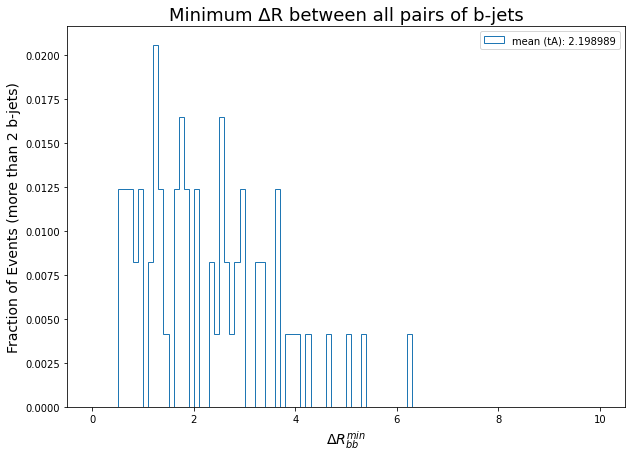

In [23]:
# Min delta R between b-jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []
def MinRbb(EventSize, BTag, JetEta, JetPhi):
    for i in tqdm(range(EventSize)):
        bjet = JetEta[i] * BTag[i]
        bjet_eta = bjet[ak.where(bjet)]
        bjet = JetPhi[i] * BTag[i]
        bjet_phi = bjet[ak.where(bjet)]

        if len(bjet_phi) > 1:
            m = bjet_eta - bjet_eta[:, np.newaxis]
            bjet_eta = m[np.triu_indices(len(m[0]), k = 1)]
            m = bjet_phi - bjet_phi[:, np.newaxis]
            bjet_phi = m[np.triu_indices(len(m[0]), k = 1)]

            deltaR.append(np.min(f(bjet_eta, bjet_phi)))
        else: 
            continue
    return deltaR
deltaR = MinRbb(100, Att_jet_ak['Jet.BTag'], Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'])
print(deltaR)
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.02802, label='mean (tA): %f' %np.mean(deltaR))
plt.xlabel(r'Δ$R_{bb}^{min}$', fontsize=14)
plt.ylabel('Fraction of Events (more than 2 b-jets)', fontsize=14)
plt.title('Minimum \u0394R between all pairs of b-jets', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 3000/3000 [00:14<00:00, 202.29it/s]


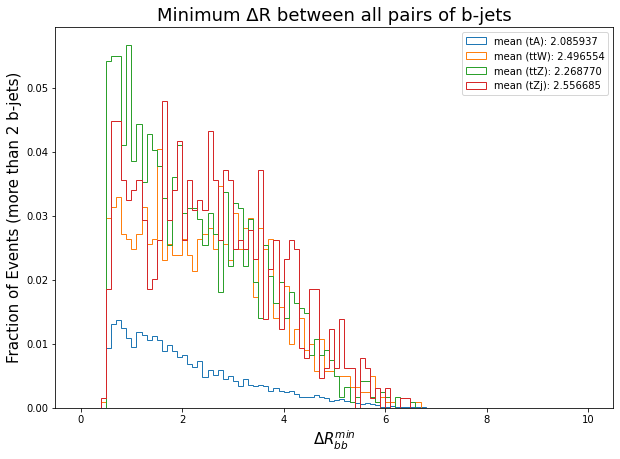

In [25]:
# Min delta R between b-jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []
def MinRbb(EventSize, BTag, JetEta, JetPhi):
    for i in tqdm(range(EventSize)):
        bjet = JetEta[i] * BTag[i]
        bjet_eta = bjet[ak.where(bjet)]
        bjet = JetPhi[i] * BTag[i]
        bjet_phi = bjet[ak.where(bjet)]

        if len(bjet_phi) > 1:
            m = bjet_eta - bjet_eta[:, np.newaxis]
            bjet_eta = m[np.triu_indices(len(m[0]), k = 1)]
            m = bjet_phi - bjet_phi[:, np.newaxis]
            bjet_phi = m[np.triu_indices(len(m[0]), k = 1)]

            deltaR.append(np.min(f(bjet_eta, bjet_phi)))
        else: 
            continue
    return deltaR
deltaR = MinRbb(10000, Att_jet_ak['Jet.BTag'], Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.02802, label='mean (tA): %f' %np.mean(deltaR))

deltaR = []
deltaR = MinRbb(3000, ttW_jet_ak['Jet.BTag'], ttW_jet_ak['Jet.Eta'], ttW_jet_ak['Jet.Phi'])        
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1059, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = []
deltaR = MinRbb(3000, ttZ_jet_ak['Jet.BTag'], ttZ_jet_ak['Jet.Eta'], ttZ_jet_ak['Jet.Phi'])      
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1298, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = []
deltaR = MinRbb(3000, tZj_jet_ak['Jet.BTag'], tZj_jet_ak['Jet.Eta'], tZj_jet_ak['Jet.Phi'])   
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1275, label='mean (tZj): %f' %np.mean(deltaR))
plt.xlabel(r'Δ$R_{bb}^{min}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 2 b-jets)', fontsize=15)
plt.title('Minimum \u0394R between all pairs of b-jets', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 3000/3000 [00:02<00:00, 1253.19it/s]


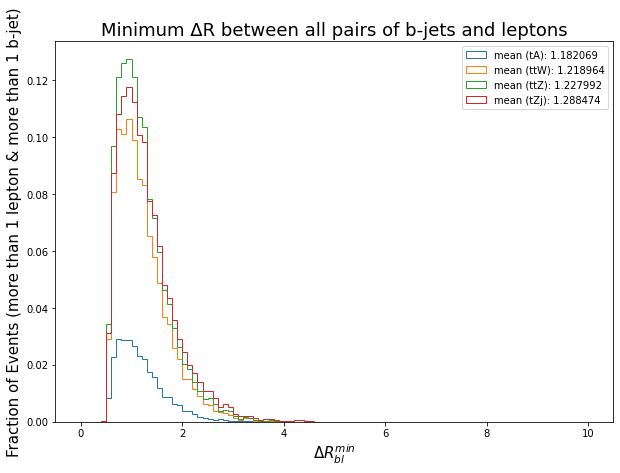

In [26]:
# Minimum delta R between b-jets and leptons
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []

def MinR_bl(EventSize, JetEta, JetPhi, EleEta, ElePhi, MuonEta, MuonPhi):
    for i in tqdm(range(EventSize)):
        jet_eta, jet_phi = JetEta[i], JetPhi[i]
        if len(EleEta[i]) == 0 and len(MuonEta[i]) != 0:
            lep_eta, lep_phi = MuonEta[i], MuonPhi[i]
        elif len(EleEta[i]) != 0 and len(MuonEta[i]) == 0:
            lep_eta, lep_phi = EleEta[i], ElePhi[i]
        else: 
            lep_eta, lep_phi = [], []

        if len(jet_phi) != 0 and len(lep_phi) != 0:

            deltaeta = np.array([i-j for i in jet_eta for j in lep_eta])
            deltaphi = np.array([i-j for i in jet_phi for j in lep_phi])
            deltaR.append(min(f(deltaeta, deltaphi)))
        else: 
            continue
            
    return deltaR
deltaR = MinR_bl(10000, Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'], Att_electron['Electron.Eta'], 
                 Att_electron['Electron.Phi'], Att_muon['Muon.Eta'], Att_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.02802, label='mean (tA): %f' %np.mean(deltaR))

deltaR = MinR_bl(3000, ttW_jet_ak['Jet.Eta'], ttW_jet_ak['Jet.Phi'], ttW_electron['Electron.Eta'],
                 ttW_electron['Electron.Phi'], ttW_muon['Muon.Eta'], ttW_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1059, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = MinR_bl(3000, ttZ_jet_ak['Jet.Eta'], ttZ_jet_ak['Jet.Phi'], ttZ_electron['Electron.Eta'],
                 ttZ_electron['Electron.Phi'], ttZ_muon['Muon.Eta'], ttZ_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1298, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = MinR_bl(3000, tZj_jet_ak['Jet.Eta'], tZj_jet_ak['Jet.Phi'], tZj_electron['Electron.Eta'],
                 tZj_electron['Electron.Phi'], tZj_muon['Muon.Eta'], tZj_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1275, label='mean (tZj): %f' %np.mean(deltaR))



plt.xlabel(r'$ΔR_{bl}^{min}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 1 lepton & more than 1 b-jet)', fontsize=15)
plt.title('Minimum \u0394R between all pairs of b-jets and leptons', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 3000/3000 [00:20<00:00, 148.12it/s]


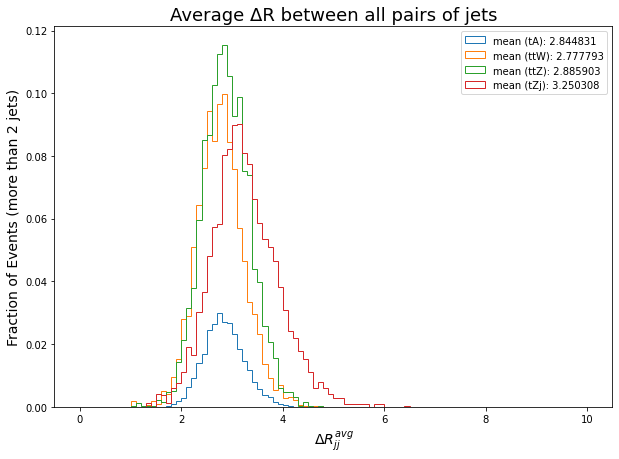

In [31]:
# Average delta R between all jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []

for i in tqdm(range(len(Att_jet_ak['Jet.Eta']))):

    jet_eta = Att_jet_ak['Jet.Eta'][i]
    jet_phi = Att_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = m[np.triu_indices(len(m[0]), k = 1)]

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.02802, label='mean (tA): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(ttW_jet_ak['Jet.Eta']))):

    jet_eta = ttW_jet_ak['Jet.Eta'][i]
    jet_phi = ttW_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = m[np.triu_indices(len(m[0]), k = 1)]

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1059, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(ttZ_jet_ak['Jet.Eta']))):

    jet_eta = ttZ_jet_ak['Jet.Eta'][i]
    jet_phi = ttZ_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = m[np.triu_indices(len(m[0]), k = 1)]

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1298, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(tZj_jet_ak['Jet.Eta']))):

    jet_eta = tZj_jet_ak['Jet.Eta'][i]
    jet_phi = tZj_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = m[np.triu_indices(len(m[0]), k = 1)]

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', weights=np.ones(len(deltaR))/len(deltaR)/n[0]*0.1275, label='mean (tZj): %f' %np.mean(deltaR))
plt.xlabel(r'$ΔR_{jj}^{avg}$', fontsize=14)
plt.ylabel('Fraction of Events (more than 2 jets)', fontsize=14)
plt.title('Average \u0394R between all pairs of jets', fontsize=18)
plt.legend()
plt.show()

Area below the integral:  0.027960086524125217
Area below the integral:  0.10564195906433141
Area below the integral:  0.12930207954774375
Area below the integral:  0.1274220183486308


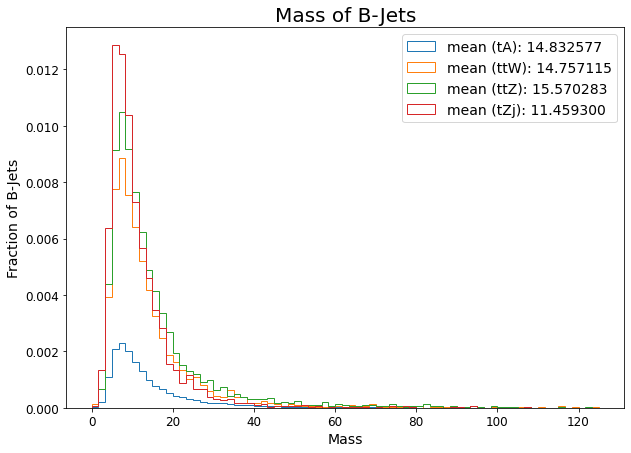

In [14]:
# testing
tagsize = 14
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 125, 76)
m = np.diff(bin)
m1 = ak.flatten(Att_jet_ak['Jet.Mass']*Att_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(Att_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(Att_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.02802, label='mean (tA): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(ttW_jet_ak['Jet.Mass']*ttW_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(ttW_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(ttW_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1059, label='mean (ttW): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(ttZ_jet_ak['Jet.Mass']*ttZ_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(ttZ_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(ttZ_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1298, label='mean (ttZ): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(tZj_jet_ak['Jet.Mass']*tZj_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(tZj_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(tZj_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1275, label='mean (tZj): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))

plt.legend(fontsize=14)
plt.xlabel('Mass' , fontsize=14) 
plt.ylabel("Fraction of B-Jets", fontsize=14) 
plt.title('Mass of B-Jets', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


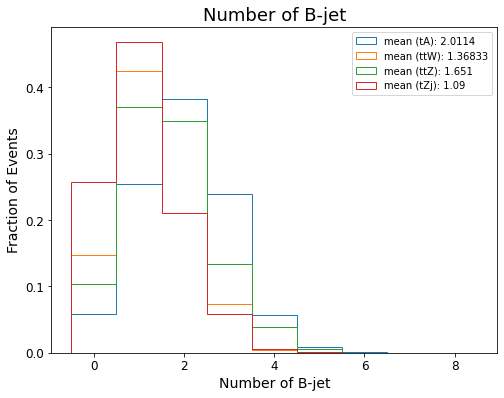

In [15]:
plt.figure(figsize=(8,6)) 
bin = np.linspace(-0.5, 8.5, 10)
print(bin)

num_bjet = ak.count_nonzero(Att_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (tA): {ak.mean(num_bjet)}')

num_bjet = ak.count_nonzero(ttW_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (ttW): {round(ak.mean(num_bjet), 5)}')

num_bjet = ak.count_nonzero(ttZ_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (ttZ): {ak.mean(num_bjet)}')

num_bjet = ak.count_nonzero(tZj_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (tZj): {ak.mean(num_bjet)}')

plt.legend()
plt.xlabel('Number of B-jet' , fontsize=14) 
plt.ylabel("Fraction of Events", fontsize=14) 
plt.title('Number of B-jet', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

Area below the integral:  0.027919128000001903
Area below the integral:  0.10582939999999656
Area below the integral:  0.12980000000000608
Area below the integral:  0.12750000000000772


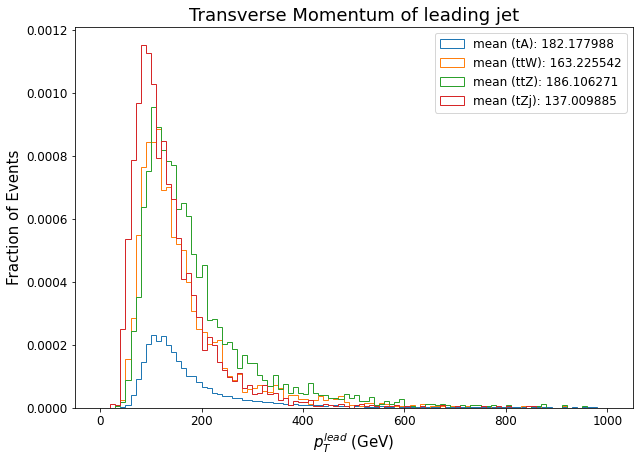

In [32]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 1000, 101)
m = np.diff(bin)
m1 = ak.max(Att_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, label='mean (tA): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(ttW_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, label='mean (ttW): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(ttZ_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, label='mean (ttZ): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(tZj_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, label='mean (tZj): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))

plt.legend(fontsize=12)
plt.xlabel(r'$p_{T}^{lead}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum of leading jet', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

In [34]:
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []

def MinR_bl(EventSize, JetEta, JetPhi, EleEta, ElePhi, MuonEta, MuonPhi):
    for i in tqdm(range(EventSize)):
        jet_eta, jet_phi = JetEta[i], JetPhi[i]
        if len(EleEta[i]) == 0 and len(MuonEta[i]) != 0:
            lep_eta, lep_phi = MuonEta[i], MuonPhi[i]
        elif len(EleEta[i]) != 0 and len(MuonEta[i]) == 0:
            lep_eta, lep_phi = EleEta[i], ElePhi[i]
        else: 
            lep_eta, lep_phi = [], []

        if len(jet_phi) != 0 and len(lep_phi) != 0:
            print(jet_phi, lep_eta)

            deltaeta = np.array([i-j for i in jet_eta for j in lep_eta])
            print(deltaeta)
            deltaphi = np.array([i-j for i in jet_phi for j in lep_phi])
            deltaR.append(min(f(deltaeta, deltaphi)))
        else: 
            continue
            
    return deltaR
deltaR = MinR_bl(5, Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'], Att_electron['Electron.Eta'], 
                 Att_electron['Electron.Phi'], Att_muon['Muon.Eta'], Att_muon['Muon.Phi'])

  0%|          | 0/5 [00:00<?, ?it/s]

[-2.38, 0.105, -0.0155, -1.14, 2.49, 1.33, 2.56] [-1.76]
[ 0.06437206 -0.64438844  0.30007613  0.1628356   0.75048769  0.52614033
 -0.26703119]


In [53]:
mt(1, 1, [1, 1])

array([0.95885108, 0.95885108])

100%|██████████| 3000/3000 [00:06<00:00, 496.81it/s]


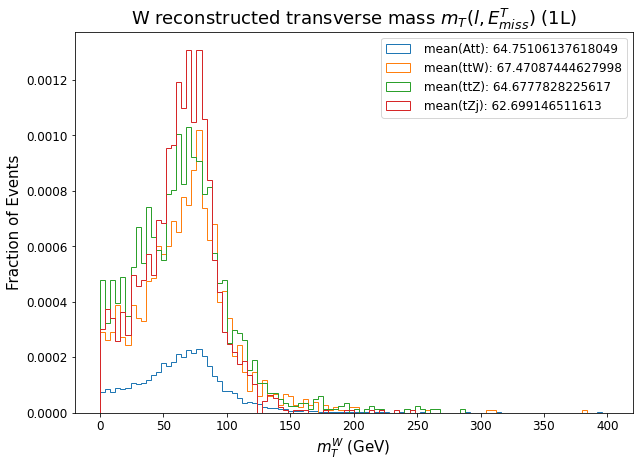

In [71]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 400, 101)
def mt(pt, Et_miss, deltaphi):
    return np.sqrt(2*pt*Et_miss*(1-np.cos(deltaphi)))

def WTransverMass(EventSize, ElePt, ElePhi, MuonPt, MuonPhi, MET, EtPhi):
    mwt = []
    for i in tqdm(range(EventSize)):
        Et, Et_phi = MET[i], EtPhi[i]
        if len(ElePhi[i]) == 0 and len(MuonPhi[i]) != 0:
            lep_pt, lep_phi = MuonPt[i], MuonPhi[i]
        elif len(ElePhi[i]) != 0 and len(MuonPhi[i]) == 0:
            lep_pt, lep_phi = ElePt[i], ElePhi[i]
        else: 
            lep_pt, lep_phi = [], []
    
        if len(Et_phi) != 0 and len(lep_phi) != 0:
            deltaphi = list(np.abs([i-j for i in Et_phi for j in lep_phi]))
            mwt.append(mt(lep_pt, Et, deltaphi))
        else: 
            continue 
    return np.concatenate(mwt)
        
mwt = WTransverMass(10000, Att_electron['Electron.PT'], Att_electron['Electron.Phi'], Att_muon['Muon.PT'],
                    Att_muon['Muon.Phi'], Att_Emiss['MissingET.MET'], Att_Emiss['MissingET.Phi'])
plt.hist(mwt, bins=bin, histtype='step', weights=np.ones(len(mwt))/len(mwt)/m[0]*0.02802, label=f' mean(Att): {np.mean(mwt)}')

mwt = WTransverMass(3000, ttW_electron['Electron.PT'], ttW_electron['Electron.Phi'], ttW_muon['Muon.PT'],
                    ttW_muon['Muon.Phi'], ttW_Emiss['MissingET.MET'], ttW_Emiss['MissingET.Phi'])
plt.hist(mwt, bins=bin, histtype='step', weights=np.ones(len(mwt))/len(mwt)/m[0]*0.1059, label=f' mean(ttW): {np.mean(mwt)}')

mwt = WTransverMass(3000, ttZ_electron['Electron.PT'], ttZ_electron['Electron.Phi'], ttZ_muon['Muon.PT'],
                    ttZ_muon['Muon.Phi'], ttZ_Emiss['MissingET.MET'], ttZ_Emiss['MissingET.Phi'])
plt.hist(mwt, bins=bin, histtype='step', weights=np.ones(len(mwt))/len(mwt)/m[0]*0.1298, label=f' mean(ttZ): {np.mean(mwt)}')

mwt = WTransverMass(3000, tZj_electron['Electron.PT'], tZj_electron['Electron.Phi'], tZj_muon['Muon.PT'],
                    tZj_muon['Muon.Phi'], tZj_Emiss['MissingET.MET'], tZj_Emiss['MissingET.Phi'])
plt.hist(mwt, bins=bin, histtype='step', weights=np.ones(len(mwt))/len(mwt)/m[0]*0.1275, label=f' mean(tZj): {np.mean(mwt)}')

plt.legend(fontsize=12)
plt.xlabel(r'$m_{T}^{W}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title(r'W reconstructed transverse mass $m_{T} (l, E_{miss}^{T})$ (1L)', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()
